<h1>Yksinkertainen eksponentiaalinen tasoitus</h1>

Yksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa ei ole havaittavaa trendiä tai kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.

Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.

Eksponentiaalinen tasoitus löytyy <b>statsmodels.tsa</b>-kirjastosta.

Huomaa, että tässä esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

Lisätietoa https://tilastoapu.wordpress.com/2018/08/30/aikasarjaennustaminen-1/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

<h2>Aikasarjaan tutustuminen</h2>

In [2]:
df = pd.read_excel('http://taanila.fi/aikasarja.xlsx')
df.head()

,Vuosineljännes,Kysyntä
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450


In [3]:
# Aikaleimat indeksiin
# to_datetime muuntaa merkkijonomuotoisen tiedon aikaleimoiksi
# format mahdollistaa erilaisten esitysmuotojen tunnistamisen aikaleimoiksi
df.index = pd.to_datetime(df['Vuosineljännes'], format = "%Y-%m-%d")

# Pudotetaan tarpeettomaksi käynyt sarake pois
df = df.drop('Vuosineljännes', axis = 1)
df.head()

,Kysyntä
Vuosineljännes,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450


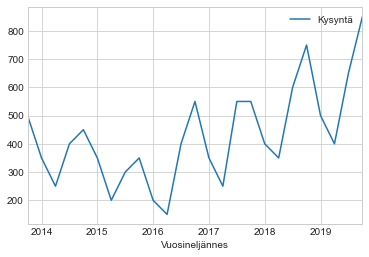

In [4]:
df.plot()

<h2>Mallin sovitus</h2>

Ennustemalli sovitetaan (<b>fit()</b>) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi <b>malli</b>), joka sisältää monenlaista tietoa mallista.

<b>freq</b>-parametrille käytän arvoa <b>'Q'</b>, koska kyseessä ovat vuosineljänneksien viimeiset päivät. Lisätietoa <b>freq</b>-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [5]:
malli = ExponentialSmoothing(df['Kysyntä'], freq = 'Q').fit()

In [6]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Ennuste'] = malli.fittedvalues
df

,Kysyntä,Ennuste
Vuosineljännes,,
2013-12-31,500,388.106374
2014-03-31,350,424.220025
2014-06-30,250,400.265523
2014-09-30,400,351.767347
2014-12-31,450,367.334429
2015-03-31,350,394.014730
2015-06-30,200,379.808982
2015-09-30,300,321.775660
2015-12-31,350,314.747569


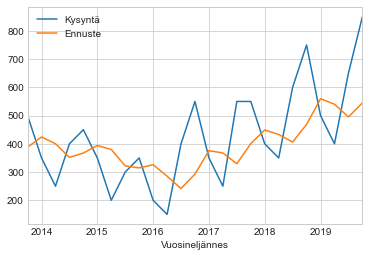

In [7]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [8]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2013-12-31,500,388.106374,111.893626
2014-03-31,350,424.220025,-74.220025
2014-06-30,250,400.265523,-150.265523
2014-09-30,400,351.767347,48.232653
2014-12-31,450,367.334429,82.665571
2015-03-31,350,394.014730,-44.014730
2015-06-30,200,379.808982,-179.808982
2015-09-30,300,321.775660,-21.775660
2015-12-31,350,314.747569,35.252431


<h2>Mallin tarkastelu</h2>

Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
<ul><li>ennustevirheiden aikasarjaa viivakaaviona</li>
    <li>ennusteiden ja toteutuneiden arvojen hajontakaaviota</li>
    <li>malliin liittyvää statistiikkaa, jonka saan <b>summary()</b>-toiminnolla.</li>
</ul>
Huomaa erityisesti <b>SSE</b> (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.

Text(0, 0.5, 'Ennustevirhe')

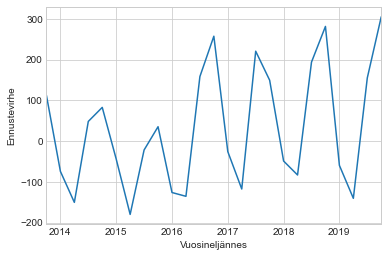

In [9]:
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

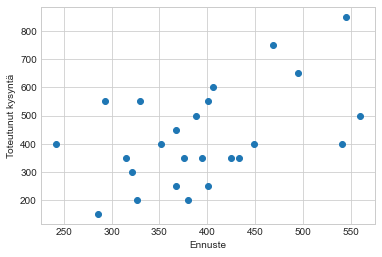

In [10]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Kysyntä'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [11]:
malli.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,562690.236
Optimized:,True,AIC,254.540
Trend:,None,BIC,256.978
Seasonal:,None,AICC,256.540
Seasonal Periods:,None,Date:,"Mon, 21 Dec 2020"
Box-Cox:,False,Time:,15:59:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3227499,alpha,True
initial_level,388.10637,l.0,True


<h2>Ennusteiden laskeminen</h2>

Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
<ul><li>Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.</li>
    <li>Ennustettavien ajankohtien lukumäärän voin määrittää <b>periods</b>-parametrilla.</li>
    <li>Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty <b>freq</b>-parametrin arvo.</li></ul>
        
Lisätietoa <b>freq</b>-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [12]:
#Tarkistan viimeisen aikaleiman
df.tail()

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2018-12-31,750,468.808607,281.191393
2019-03-31,500,559.563088,-59.563088
2019-06-30,400,540.339110,-140.339110
2019-09-30,650,495.044683,154.955317
2019-12-31,850,545.056489,304.943511


In [13]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-03-31', periods = 8, freq = 'Q')

# Ennusteet kahdeksalle vuosineljännekselle
ennusteet = malli.forecast(8)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2020-03-31,643.476962
2020-06-30,643.476962
2020-09-30,643.476962
2020-12-31,643.476962
2021-03-31,643.476962
2021-06-30,643.476962
2021-09-30,643.476962
2021-12-31,643.476962


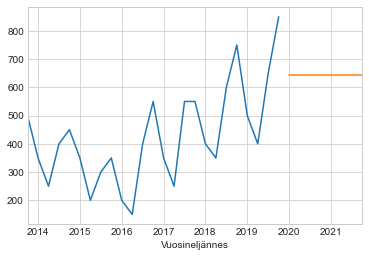

In [14]:
# Viivakaavio havainnoista
df['Kysyntä'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

Huomaa, että yksinkertainen eksponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.